# Live loss plots in Jupyter Notebook for Keras

by [Piotr Migdał](http://p.migdal.pl/)

* inspired by a Reddit discussion [Live loss plots inside Jupyter Notebook for Keras? - r/MachineLearning](https://www.reddit.com/r/MachineLearning/comments/65jelb/d_live_loss_plots_inside_jupyter_notebook_for/)
* my other Keras add-on: [Sequential model in Keras -> parameter ASCII diagram](https://github.com/stared/keras-sequential-ascii)

In [1]:
%matplotlib inline

import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

C:\Users\sushil.shah\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
keras.__version__

'2.1.4'

In [3]:
# data loading
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# data preprocessing
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.

In [5]:
# # updatable plot
# # a minimal example (sort of)

# class PlotLosses(keras.callbacks.Callback):
#     def on_train_begin(self, logs={}):
#         self.i = 0
#         self.x = []
#         self.losses = []
#         self.val_losses = []
        
#         self.fig = plt.figure()
        
#         self.logs = []

#     def on_epoch_end(self, epoch, logs={}):
        
#         self.logs.append(logs)
#         self.x.append(self.i)
#         self.losses.append(logs.get('loss'))
#         self.val_losses.append(logs.get('val_loss'))
#         self.i += 1
        
#         clear_output(wait=True)
#         plt.plot(self.x, self.losses, label="loss")
#         plt.plot(self.x, self.val_losses, label="val_loss")
#         plt.legend()
#         plt.show();
        
# plot_losses = PlotLosses()

In [12]:
class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
plot = PlotLearning()

In [13]:
print(Y_test.shape)
print(X_train.shape)

(10000, 10)
(60000, 28, 28, 1)


In [14]:
#reshape
trainX =  np.reshape(X_train, (X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
testX =  np.reshape(X_test, (X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# testX =  np.reshape(X_test, [X_test.shape[0]], (X_test.shape[1] * X_test.shape[2]))
print(testX.shape)
print(trainX.shape)

(10000, 784)
(60000, 784)


In [15]:
#Model
model = Sequential()
model.add(Dense(512, activation='relu', use_bias=True, input_shape=(784, )))
model.add(Dense(128, activation='relu', use_bias=True, ))
model.add(Dense(10, activation='softmax', use_bias=True))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

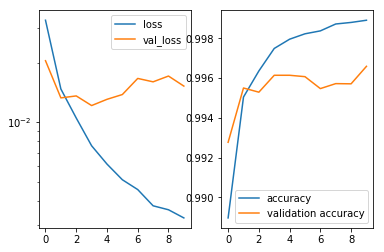

In [16]:
# Fit the model
# model.fit(trainX, Y_train,
#           epochs=10,
#           validation_data=(testX, Y_test),
#           callbacks=[plot_losses],
#           verbose=0)
model.fit(trainX, Y_train,
          epochs=10,
          validation_data=(testX, Y_test),
          callbacks=[plot],
          verbose=0)

# history = model.fit(trainX, Y_train, epochs=150, batch_size=10)
# history = model.fit(trainX, Y_train, epochs=10, batch_size=1000)
# evaluate the model
# scores = model.evaluate(testX, Y_test)
# print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [22]:
# just logistic regression, to keep it simple and fast

model = Sequential()

model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

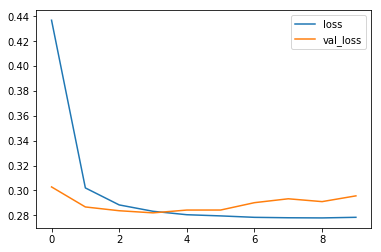

In [23]:
# in this static viewer it is not obvious,
# but this plot grows step by step

model.fit(X_train, Y_train,
          epochs=10,
          validation_data=(X_test, Y_test),
          callbacks=[plot_losses],
          verbose=0)

## Further ideas

* loss and accuracy side by side, as two plots
* time per epoch (plot title?)